# Logistic Regression Facebook Dataset

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

## Facebook Dataset

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

In [114]:
training_set = pd.read_csv("datasets/Facebook_Ads_2.csv",encoding ='ISO-8859-1')
training_set.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [125]:
training_set.shape

(499, 6)

In [120]:
# Split into two dataframes for those that clicked and those that didn't
click    = training_set[training_set['Clicked']==1]
no_click = training_set[training_set['Clicked']==0]

In [122]:
print("Total =", len(training_set))
print("Number of customers who clicked on Ad =", len(click))
print("Percentage Clicked =", 1.*len(click)/len(training_set)*100.0, "%")
print("Did not Click =", len(no_click))
print("Percentage who did not Click =", 1.*len(no_click)/len(training_set)*100.0, "%")

Total = 499
Number of customers who clicked on Ad = 250
Percentage Clicked = 50.1002004008016 %
Did not Click = 249
Percentage who did not Click = 49.899799599198396 %


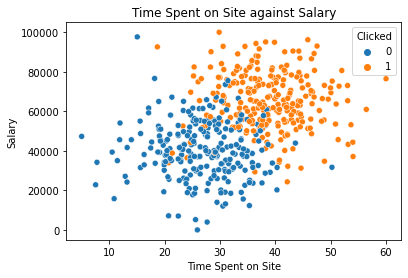

In [128]:
x = training_set['Time Spent on Site']
y = training_set["Salary"]
ax = sns.scatterplot(x=x,y=y, hue = training_set['Clicked']).set_title("Time Spent on Site against Salary")

People who spent the most time on the site and with higher salaries are more likely to click on the ad

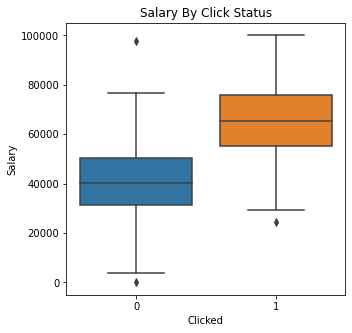

In [135]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='Clicked', y='Salary',data=training_set).set_title("Salary By Click Status")

The average salary of those who clicked on the ad is higher than that of those who didn't. 

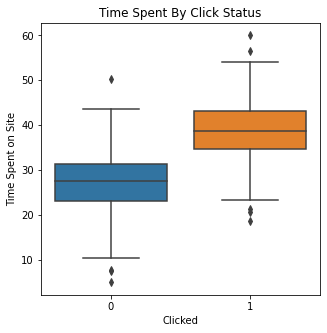

In [134]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='Clicked', y='Time Spent on Site',data=training_set).set_title("Time Spent By Click Status")

The average time spent on the site by those who clicked on the ad is higher

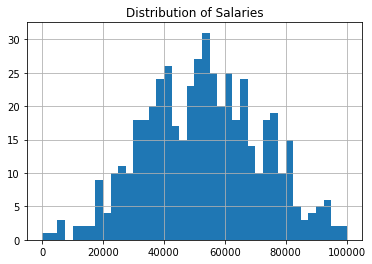

In [136]:
training_set['Salary'].hist(bins = 40)
ax = plt.title("Distribution of Salaries")

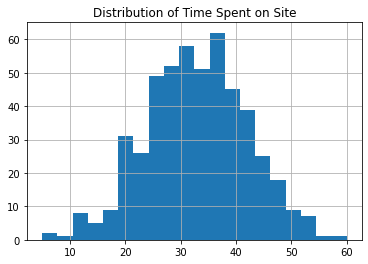

In [137]:
training_set['Time Spent on Site'].hist(bins = 20)
ax = plt.title("Distribution of Time Spent on Site")

Fairly normally distributed with the average time spent around 30 to 40 minutes

In [138]:
# Drop columns not required
training_set.drop(['Names', 'emails', 'Country'],axis=1,inplace=True)

In [142]:
training_set.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


In [140]:
X = training_set.drop('Clicked',axis=1).values
y = training_set['Clicked'].values
sc = StandardScaler()
X = sc.fit_transform(X)

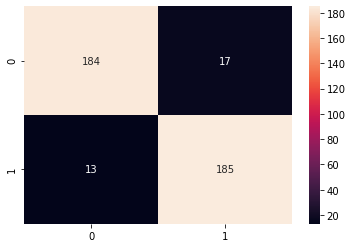

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_predict_train = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
ax = sns.heatmap(cm, annot=True, fmt="d")

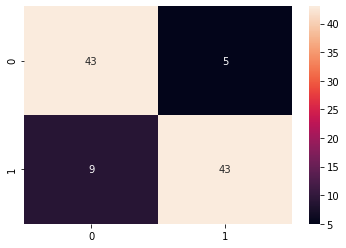

In [147]:
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
ax= sns.heatmap(cm, annot=True, fmt="d")

In [148]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



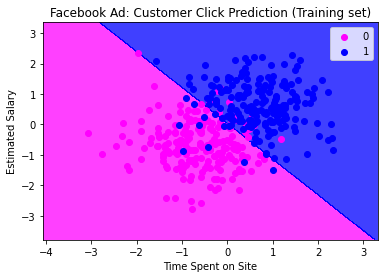

In [162]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(['magenta', 'blue'])(i),label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

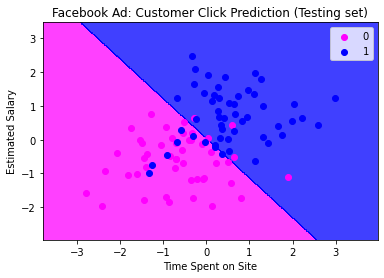

In [163]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(['magenta', 'blue'])(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()